In [1]:
import praw
from psaw import PushshiftAPI
import datetime as dt
import csv
import pandas as pd
import numpy as np

In [2]:
#old code to grab tweet ids -- idk might be useful later
# for i in range(10, 32):
#     url = f"https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-08-{i}/2021-08-{i}-dataset.tsv.gz?raw=true"
#     tweet = pd.read_csv(url, compression = 'gzip', delimiter = '\t')
#     tweet = tweet[tweet["lang"] == 'en']
#     print(tweet.shape)
#     tweet['tweet_id'].to_csv(f"C:\\Users\chris\\Downloads\\filtered_tweet_ids\\08_{i}.csv", index = False, header = False)

In [2]:
reddit = praw.Reddit(
    client_id = 'lpOMB5T4GTN848_Y3EYwDA',
    client_secret="fw_bmX2pOhaAu1ZzXGmlT8DYs04rCA",
    user_agent= "Math 168 Project by math168_project",
    username="math168_project",
    password="networks123"
)

api = PushshiftAPI()

list of subreddits:  
* antivaccine now a space jam sub?
* trueantivaccination (quarantined) done
* Vaccines done
* CovidVaccine done
* CovidVaccinated done
* AntiVaxxers done
* conspiracy* 
* conspiracytheories* 
* NoNewNormal banned :( = prob a lot less antivaxx posts
* conspiracy_commons* 
* COVID19* done
* COVID private
* coronavirus* done
* conservative* done
* worldnews* done
* news* 

\* = search terms used

In [1]:
covid_terms = 'covid|covid19|c19|corona|coronavirus|CoV-2|pandemic|variant|delta|virus|infection|infect|fauci|cdc|fda|mandate'
vaccine_terms = 'shot|vaccine|vacine|vacines|vaccines|vaccinate|vaccination|vaccinations|vaccinated|vaccinating|vaxxed|vaxx|vax|\
unvaccinated|unvaxxed|antivaxx|antivaccination|anti|\
moderna|pfizer|J&J|immune|immunize|immunizes|immunized|immunization|immunizations'

In [5]:
start_epoch=int(dt.datetime(2021, 8, 10).timestamp()) #searches for posts after midnight 8/10
end_epoch = int(dt.datetime(2021, 9, 1).timestamp()) #stops getting posts at midnight 9/1
ids = list(api.search_submissions(after=start_epoch, #makes list of psaw submission objects
                                  before = end_epoch,
                                  filter = ['id'],
                                  title = covid_terms+vaccine_terms,
                                  subreddit = 'news'))#searches for keywords in title only)
len(ids)

In [29]:
with open("C:\\Users\\chris\\Documents\\Math168Project\\no_search.csv", 'a', encoding="utf-8") as file:
    #setting up the csv file
    headers = ['ID', 'Date_utc', 'Author', 'Body', 'Submission', 'Parent_ID', 'Parent_Author', 'Level']
    writer = csv.DictWriter(file, fieldnames = headers, extrasaction='ignore')
    writer.writeheader()
    
    for psaw_submission in ids: #goes through list of ids matching criteria
        post = reddit.submission(id = psaw_submission.d_['id']) #turns psaw submission into praw submission
        post.comments.replace_more(limit = 0)
        
        for comment in post.comments: #goes through top level comments 
            if (not post.author) and (not comment.author): #skip if both post and comment author deleted
                continue
            data = {'ID':comment.id, 'Date_utc':comment.created_utc, 'Author':comment.author, 'Body': comment.body,
            'Submission':post.id, 'Parent_ID':post.id, 'Parent_Author':post.author, 'Level':1}
            writer.writerow(data)
            
            for reply in comment.replies: #second level comments
                if not reply.author: #account deleted/comment deleted/moderator removed
                    continue
                data = {'ID':reply.id, 'Date_utc':reply.created_utc, 'Author':reply.author, 'Body': reply.body,
                        'Submission':post.id, 'Parent_ID':comment.id, 'Parent_Author':comment.author, 'Level':2}
                writer.writerow(data)

In [20]:
# with open("C:\\Users\\chris\\Documents\\Math168Project\\conspiracy_subs.csv", 'a', encoding="utf-8") as file:
#     #setting up the csv file
#     headers = ['ID', 'Date_utc', 'Author', 'Body', 'Parent_ID', 'Parent_Author', 'Post_ID', 'Post_Author', Post_Title', 'Subreddit_ID']
#     writer = csv.DictWriter(file, fieldnames = headers, extrasaction='ignore')
#     writer.writeheader()
    
#     for psaw_submission in ids: #goes through list of ids matching criteria
#         post = reddit.submission(id = psaw_submission.d_['id']) #turns psaw submission into praw submission
       
#         post.comments.replace_more(limit = 0)
#         for comment in post.comments.list(): 
#             if not comment.author: #skip if comment author deleted
#                 continue
#             if comment.author == 'AutoModerator': #skip automatic comments
#                 continue
#             parent_author = reddit.comment(id = comment.parent_id).author
#             data = {'ID':comment.id, 'Date_utc':comment.created_utc, 'Author':comment.author, 'Body': comment.body,
#                     'Parent_ID':comment.parent_id, 'Parent_Author':parent_author, 
#                     'Post_ID':post.id, 'Post_Title': post.title,
#                    'Subreddit_ID':comment.subreddit_id}
#             writer.writerow(data)
            

# extra code messing around

In [60]:
demo = demo.dropna(subset = ['Author'])
demo = demo.dropna(subset = ['Parent_Author', 'Submission_Author'], how = 'all')

In [61]:
demo.shape

(582, 11)

In [13]:
import networkx as nx

In [63]:
G = nx.from_pandas_edgelist(demo, source = "Author", target = "Parent_Author", create_using = nx.MultiGraph)

In [64]:
G.number_of_nodes()

346

In [65]:
component = max(nx.connected_components(G), key=len) #finds largest connected component, then saves the largest to C
C = G.subgraph(component)

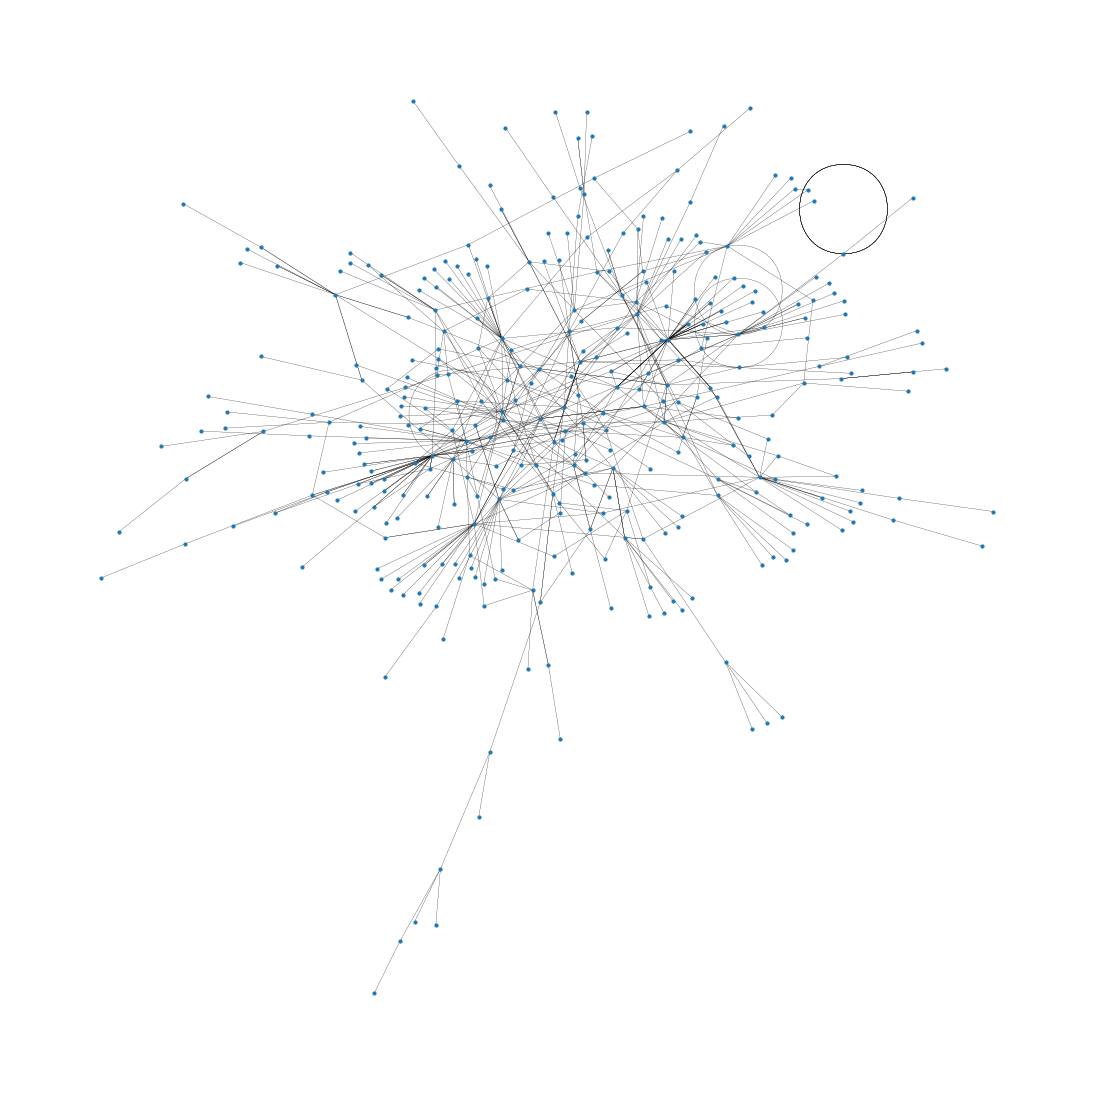

In [71]:
plt.figure(1, figsize = (15,15))
nx.draw(C, node_size = 10, width = 0.25)

In [86]:
node_degrees = dict(G.degree())
dict(sorted(node_degrees.items(), key=lambda item: item[1], reverse = True))

{nan: 4112,
 'lannister80': 615,
 'whosthetard': 568,
 'polymath22': 459,
 'VeganExcellency': 361,
 'AutisticShoeshineB0y': 354,
 'BrickTamblan': 304,
 'Philosophyoffreehood': 289,
 'ParioPraxis': 273,
 'missrabbitifyanasty': 268,
 'boredtxan': 197,
 'Mixi_987': 190,
 'QuantumSeagull': 184,
 'kjnpuppy': 176,
 'VastScene': 175,
 'notsostoic': 171,
 'jgjbl216': 161,
 'bxxxx34': 155,
 'bulletsmightworkjon': 154,
 'billnibble': 151,
 'masterflappie': 151,
 'BuriedUnderTheDirt': 145,
 'r2002': 145,
 'zenos1337': 143,
 'ArachnidBoth3686': 141,
 'kitzunenotsuki': 140,
 'Reiko707': 140,
 'StornZ': 136,
 'Inevitable_Cry706': 132,
 'Impossible_Piano2938': 130,
 'A-Lonely-Gorilla': 128,
 'Rodereck': 127,
 'vasilis1234567': 124,
 'clowningAnarchist': 122,
 'SnooGiraffes216': 122,
 'spikemike1979': 118,
 'Fla7liN3': 118,
 '10MileHike': 117,
 'SpookyActionSix': 115,
 'ScottFreestheway2B': 115,
 'fuckthevaccine28': 114,
 'huenix': 113,
 'killer_muffinj93': 113,
 'Turbulent_Manager_70': 113,
 'HYPERCO

In [2]:
reddit_data = []
for i in range(1,5):
    data = pd.read_csv(f"C:\\Users\\chris\\Documents\\Math168Project\\reddit_data_{i}.csv")
    reddit_data.append(data)
    
total_data = pd.concat(reddit_data, ignore_index = True)
total_data.to_csv("C:\\Users\\chris\\Documents\\Math168Project\\reddit_data.csv", index = False)


In [3]:
total_data.shape

(194638, 12)

In [6]:
total_data = total_data.drop(["Unnamed: 0"], axis = 1)
total_data = tota

,ID,Date_utc,Author,Body,Submission,Parent_ID,Parent_Author,Level,Subreddit,Submission_Author,Submission_Title
0,hb5o5xe,1.630477e+09,krusty3x,This alone should put him In the chair.,pfnoiq,pfnoiq,8uwotm8,1,trueantivaccination,8uwotm8,Fauci-run NIAID spends almost $500k to run cru...
1,hb5tb0n,1.630481e+09,8uwotm8,nah he and his cumstains evil f4scists should ...,pfnoiq,hb5o5xe,krusty3x,2,trueantivaccination,8uwotm8,Fauci-run NIAID spends almost $500k to run cru...
2,hb88isn,1.630526e+09,SerScronzarelli,Grasping for straws aren't you?,pfmh8q,pfmh8q,Revolutionary-Comb35,1,trueantivaccination,Revolutionary-Comb35,Was this young lady a recent recipient of a vax?
3,hb9cje6,1.630545e+09,Revolutionary-Comb35,Inquiring minds want to know; \r\n\r\nwhat IF ...,pfmh8q,hb88isn,SerScronzarelli,2,trueantivaccination,Revolutionary-Comb35,Was this young lady a recent recipient of a vax?
4,hdndp6o,1.632178e+09,Revolutionary-Comb35,Have you change your tune about my inquiry now...,pfmh8q,hb88isn,SerScronzarelli,2,trueantivaccination,Revolutionary-Comb35,Was this young lady a recent recipient of a vax?
...,...,...,...,...,...,...,...,...,...,...,...
194633,h8dwuji,1.628581e+09,No_Difference9753,Couldn't be... Republicans said children are i...,p1kequ,p1kequ,witchygoddess333,1,news,witchygoddess333,Children in the hospital with COVID
194634,h8e0gq6,1.628585e+09,BrainOil,Plus they're pro life. That's how you know the...,p1kequ,h8dwuji,No_Difference9753,2,news,witchygoddess333,Children in the hospital with COVID
194635,h8dzw3g,1.628584e+09,redander,"Sadly they will claim ""fake news""",p1kequ,p1kequ,witchygoddess333,1,news,witchygoddess333,Children in the hospital with COVID
194636,h8ebe0h,1.628594e+09,MultiStratz,"Until it's their own child, then they'll beg ...",p1kequ,h8dzw3g,redander,2,news,witchygoddess333,Children in the hospital with COVID


In [7]:
total_data = total_data.dropna(subset = ['Author'])
total_data = total_data.dropna(subset = ['Parent_Author', 'Submission_Author'], how = 'all')
total_data.shape

(172163, 12)

In [8]:
total_data = total_data[total_data["Author"] != "AutoModerator"]

In [9]:
total_data.shape

(165061, 12)

In [11]:
total_data.to_csv("C:\\Users\\chris\\Documents\\Math168Project\\reddit_data.csv", index = False)

In [12]:
4

4